# Linear regression in PyTorch

Welcome to the `02_linear_regression` notebook. This is part of a portfolio designed to showcase foundational concepts and techniques in PyTorch, with this one focusing on linear regression — a fundamental algorithm in machine learning used for predicting a continuous target variable based on one or more input features.

In this notebook, I cover essential topics including generating synthetic data, defining and training a linear regression model, and evaluating its performance. I'll also explore optimizations and best practices to improve model accuracy and efficiency. 

Through various exercises, this notebook demonstrates practical applications of linear regression in PyTorch, providing a solid foundation for more advanced projects.

## Table of contents
1. [Understanding linear regression](#understanding-linear-regression)
2. [Setting up the environment](#setting-up-the-environment)
3. [Generating synthetic data](#generating-synthetic-data)
4. [Defining the linear regression model](#defining-the-linear-regression-model)
5. [Loss function and optimizer](#loss-function-and-optimizer)
6. [Training the linear regression model](#training-the-linear-regression-model)
7. [Evaluating the model](#evaluating-the-model)
8. [Saving and loading the model](#saving-and-loading-the-model)
9. [Optimizations](#optimizations)
10. [Conclusion](#conclusion)
11. [Further exercises](#further-exercises)


## Understanding linear regression

Linear regression is a fundamental statistical method used in machine learning and data analysis to model the relationship between one or more input variables (features) and a continuous output variable (target). The primary objective of linear regression is to find the best-fitting straight line (or hyperplane in higher dimensions) that can predict the target variable from the input features.

### Key concepts

#### 1. Simple vs. multiple linear regression
- **Simple linear regression**: Involves a single input variable and aims to model the relationship between this variable and the target variable. The goal is to find a straight line that best describes this relationship.
- **Multiple linear regression**: Involves two or more input variables. The model tries to fit a hyperplane in a multidimensional space to predict the target variable.

#### 2. The best-fit line
The best-fit line (or hyperplane) is the one that minimizes the difference between the actual target values and the predicted values. This difference is known as the residuals. The smaller the residuals, the better the model fits the data.

#### 3. Model parameters
Linear regression models have coefficients (weights) and an intercept (bias). The coefficients represent the relationship between each input feature and the target variable. The intercept is the value of the target variable when all input features are zero.

#### 4. Assumptions of linear regression
For linear regression to provide reliable results, several assumptions must be met:
- **Linearity**: The relationship between the input features and the target variable should be linear.
- **Independence**: The residuals (errors) should be independent of each other.
- **Homoscedasticity**: The residuals should have constant variance across all levels of the input features.
- **Normality**: The residuals should be normally distributed.

#### 5. Model evaluation
To evaluate the performance of a linear regression model, several metrics are commonly used:
- **Mean Squared Error (MSE)**: Measures the average squared difference between actual and predicted values. Lower values indicate a better fit.
- **R-squared (R²)**: Represents the proportion of variance in the target variable that can be explained by the input features. Values range from 0 to 1, with higher values indicating a better fit.

#### 6. Overfitting and underfitting
- **Overfitting**: Occurs when the model learns the noise in the training data, leading to poor generalization to new data. This can happen if the model is too complex.
- **Underfitting**: Occurs when the model is too simple to capture the underlying pattern in the data, leading to poor performance on both training and new data.

#### 7. Regularization
Regularization techniques are used to prevent overfitting by adding a penalty to the model's complexity. Common regularization methods include:
- **Ridge regression (L2 Regularization)**: Adds a penalty proportional to the square of the coefficients.
- **Lasso regression (L1 Regularization)**: Adds a penalty proportional to the absolute value of the coefficients, which can lead to sparse models with some coefficients being zero.

### Applications

#### Economics and finance
- **Stock price prediction**: Estimating future stock prices based on historical data and market indicators.
- **Risk management**: Assessing the relationship between risk factors and asset returns.
- **Economic forecasting**: Predicting economic indicators such as GDP growth, inflation rates, and unemployment rates.
- **Credit scoring**: Evaluating the likelihood of a borrower defaulting on a loan based on their financial history.

#### Healthcare
- **Disease progression**: Modeling the progression of diseases over time based on patient data.
- **Healthcare costs**: Predicting healthcare costs for individuals or populations based on demographic and medical history data.
- **Medical research**: Identifying relationships between various factors (e.g., lifestyle, genetics) and health outcomes.
- **Patient outcomes**: Forecasting patient recovery times or survival rates based on treatment variables.

#### Marketing and sales
- **Sales forecasting**: Estimating future sales based on historical sales data, seasonality, and market trends.
- **Customer lifetime value**: Predicting the long-term value of customers based on their purchasing behavior.
- **Advertising effectiveness**: Assessing the impact of advertising campaigns on sales or brand awareness.
- **Market analysis**: Identifying trends and relationships in consumer behavior and market data.

#### Environmental science
- **Climate modeling**: Analyzing the relationship between greenhouse gas emissions and global temperatures.
- **Pollution levels**: Predicting pollution levels based on industrial activities, traffic patterns, and weather conditions.
- **Water quality**: Estimating water quality parameters based on land use, agricultural practices, and rainfall data.
- **Renewable energy forecasting**: Predicting the output of renewable energy sources like solar and wind based on weather conditions.

#### Real estate
- **Property valuation**: Estimating the value of properties based on features such as location, size, and amenities.
- **Rental price prediction**: Forecasting rental prices based on market conditions and property characteristics.
- **Market trends**: Analyzing trends in the real estate market to guide investment decisions.

#### Social sciences
- **Sociological research**: Examining relationships between social factors (e.g., education, income) and various outcomes (e.g., crime rates, health).
- **Education analysis**: Predicting student performance based on socioeconomic background, school resources, and attendance.

#### Engineering and manufacturing
- **Quality control**: Monitoring and predicting product quality based on production parameters.
- **Process optimization**: Modeling relationships between input variables and output quality to optimize manufacturing processes.
- **Failure prediction**: Estimating the likelihood of equipment failure based on usage data and maintenance history.

#### Sports and performance analysis
- **Player performance**: Predicting athlete performance based on historical performance data and training metrics.
- **Game outcome prediction**: Estimating the outcomes of sports events based on team statistics and player performance.

#### Agriculture
- **Crop yield prediction**: Forecasting crop yields based on factors such as weather conditions, soil quality, and farming practices.
- **Livestock health**: Modeling the health and productivity of livestock based on feeding practices and environmental conditions.

#### Transportation and logistics
- **Demand forecasting**: Predicting transportation demand for public transit systems or ride-sharing services.
- **Logistics optimization**: Estimating delivery times and optimizing routes based on traffic patterns and order volumes.

#### Insurance
- **Premium calculation**: Determining insurance premiums based on risk factors such as age, health status, and driving history.
- **Claim prediction**: Estimating the likelihood of insurance claims based on customer data and historical claim records.

#### Technology and internet
- **User behavior analysis**: Predicting user engagement and retention based on interaction data from websites and apps.
- **Recommendation systems**: Modeling user preferences to provide personalized content or product recommendations.

### Maths

Linear regression aims to model the relationship between a dependent variable $ y $ and one or more independent variables $ x_1, x_2, \ldots, x_n $. The goal is to find the best-fitting linear equation that predicts the value of $ y $ from the input variables.

#### Simple linear regression
For simplicity, let's start with simple linear regression, where there is only one independent variable $ x $.

##### 1. The linear model
The model assumes a linear relationship between the independent variable $ x $ and the dependent variable $ y $:
$$ y = \beta_0 + \beta_1 x + \epsilon $$
- $ \beta_0 $ is the intercept (the value of $ y $ when $ x = 0 $).
- $ \beta_1 $ is the slope (the change in $ y $ for a one-unit change in $ x $).
- $ \epsilon $ is the error term, representing the deviation of the observed values from the true line.

##### 2. The objective
The objective of linear regression is to estimate the coefficients $ \beta_0 $ and $ \beta_1 $ such that the sum of the squared differences between the observed values $ y_i $ and the predicted values $ \hat{y_i} $ is minimized. This method is known as **Ordinary Least Squares (OLS)**.

##### 3. The cost function
The cost function, also known as the **mean squared error (MSE)**, is defined as:
$$ J(\beta_0, \beta_1) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 $$
where:
$$ \hat{y_i} = \beta_0 + \beta_1 x_i $$
- $ n $ is the number of data points.
- $ y_i $ are the actual values.
- $ \hat{y_i} $ are the predicted values.

##### 4. Minimizing the cost function
To find the values of $ \beta_0 $ and $ \beta_1 $ that minimize the cost function, we take the partial derivatives of $ J(\beta_0, \beta_1) $ with respect to $ \beta_0 $ and $ \beta_1 $, set them to zero, and solve for $ \beta_0 $ and $ \beta_1 $.

The partial derivatives are:
$$ \frac{\partial J}{\partial \beta_0} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_i) = 0 $$
$$ \frac{\partial J}{\partial \beta_1} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_i) x_i = 0 $$

Solving these equations simultaneously gives the estimates:
$$ \beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2} $$
$$ \beta_0 = \bar{y} - \beta_1 \bar{x} $$
where:
- $ \bar{x} $ is the mean of the $ x $ values.
- $ \bar{y} $ is the mean of the $ y $ values.

#### Multiple linear regression
When there are multiple independent variables, the model extends to:
$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon $$

##### 1. The vector form
This can be written in vector form for convenience:
$$ \mathbf{y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\epsilon} $$
where:
- $ \mathbf{y} $ is the vector of observed values.
- $ \mathbf{X} $ is the matrix of input features, including a column of ones for the intercept.
- $ \boldsymbol{\beta} $ is the vector of coefficients.
- $ \boldsymbol{\epsilon} $ is the vector of error terms.

##### 2. The cost function
The cost function in multiple linear regression is similarly:
$$ J(\boldsymbol{\beta}) = \frac{1}{n} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^T (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) $$

##### 3. Solving for the coefficients
To minimize the cost function, we take the derivative with respect to $ \boldsymbol{\beta} $ and set it to zero:
$$ \frac{\partial J}{\partial \boldsymbol{\beta}} = -\frac{2}{n} \mathbf{X}^T (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) = 0 $$

Solving for $ \boldsymbol{\beta} $ gives:
$$ \boldsymbol{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y} $$
This equation is known as the **normal equation** and provides the least-squares estimates of the coefficients.

#### Interpretation of the coefficients
- **Intercept ($ \beta_0 $)**: The expected value of $ y $ when all $ x $ variables are zero.
- **Slope ($ \beta_i $)**: The change in the expected value of $ y $ for a one-unit change in $ x_i $, holding all other variables constant.

#### Evaluating model performance
1. **Mean Squared Error (MSE)**: The average of the squares of the residuals, providing a measure of the model's accuracy.
2. **R-squared ($ R^2 $)**: The proportion of the variance in the dependent variable that is predictable from the independent variables.

## Setting up the environment

##### **Q1: How do you install the necessary PyTorch libraries using a Jupyter notebook?**

In [ ]:
# !pip install torch torchvision torchaudio

##### **Q2: How do you import the required libraries for linear regression?**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

##### **Q3: How do you check the version of PyTorch installed?**

In [2]:
print(torch.__version__)

2.3.1+cu121


## Generating synthetic data

##### **Q4: How do you generate synthetic data for linear regression in PyTorch?**

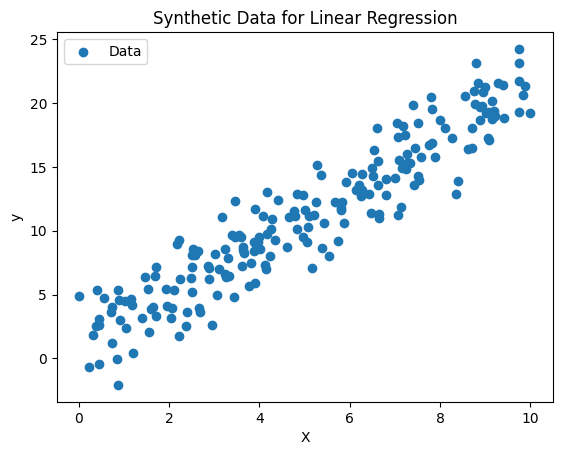

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define true parameters
true_slope = 2.0
true_intercept = 1.0

# Generate input features
n_samples = 200
X = np.random.rand(n_samples, 1) * 10

# Generate targets with some noise
noise = np.random.randn(n_samples, 1) * 2
y = true_slope * X + true_intercept + noise

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Plot the generated data
plt.scatter(X, y, label='Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data for Linear Regression')
plt.legend()
plt.show()

##### **Q5: How do you add noise to the synthetic data to simulate real-world scenarios?**

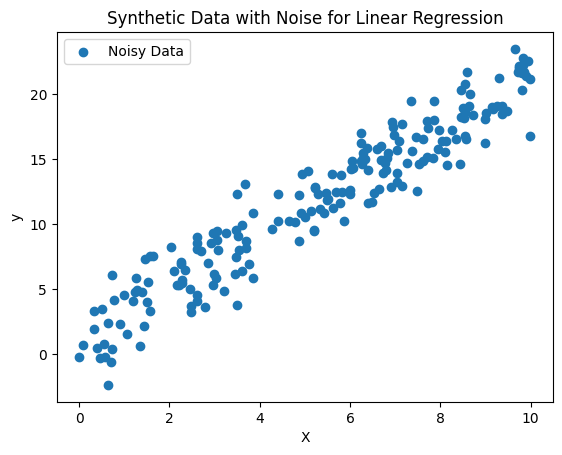

In [12]:
# Same as above. i.e.,
true_slope = 2.0
true_intercept = 1.0

n_samples = 200
X = np.random.rand(n_samples, 1) * 10

# Generate noise with a mean of 0 and a standard deviation of 2
noise = np.random.randn(n_samples, 1) * 2

y = true_slope * X + true_intercept + noise

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

plt.scatter(X, y, label='Noisy Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data with Noise for Linear Regression')
plt.legend()
plt.show()

##### **Q6: How do you visualize the synthetic data using `matplotlib`?**

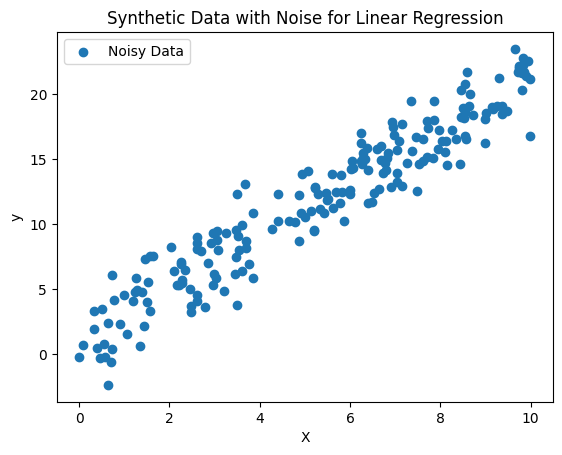

In [13]:
# Again, same as above:
plt.scatter(X, y, label='Noisy Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data with Noise for Linear Regression')
plt.legend()
plt.show()

##### **Q7: How do you split the synthetic data into training and testing sets?**

In [14]:
# Use sklearn's train_test_split
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [15]:
X_train_tensor.shape

torch.Size([160, 1])

In [16]:
X_test_tensor.shape

torch.Size([40, 1])

## Defining the linear regression model

##### **Q8: How do you define a simple linear regression model using `nn.Module` in PyTorch?**

In [17]:
# Create a custom class inheriting from nn.Module
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input and one output feature
    
    def forward(self, x):
        return self.linear(x)

# Instantiate the model
model = LinearRegressionModel()

# Print the model architecture
print(model)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


##### **Q9: How do you initialize the weights and biases of the linear regression model?**

In [21]:
# Function to initialize weights and biases
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.uniform_(m.weight, a=-0.1, b=0.1)  # Initialize weights uniformly between -0.1 and 0.1
        torch.nn.init.constant_(m.bias, 0.0)             # Initialize bias to zero

model = LinearRegressionModel()

# Apply the initialization function
model.apply(init_weights)

# Print initialized weights and biases
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

linear.weight tensor([[-0.0806]])
linear.bias tensor([0.])


##### **Q10: How do you print the model summary to view its structure?**

In [24]:
# Install the torchsummary package
# !pip install torchsummary

from torchsummary import summary

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [25]:
# Redefine the linear regression model's class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input and one output feature
    
    def forward(self, x):
        return self.linear(x)

# Instantiate the model and move it to the device (w/o doing so, PyTorch will throw out an error when trying to print the summary)
model = LinearRegressionModel().to(device)

In [26]:
# Print the model summary on the specified device
summary(model, input_size=(1,), device=device.type)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 1]               2
Total params: 2
Trainable params: 2
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


## Loss function and optimizer

##### **Q11: How do you define a loss function for linear regression in PyTorch?**

In [85]:
# Reinstantiate the linear regression class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input and one output feature
    
    def forward(self, x):
        return self.linear(x)

In [49]:
# Mean Squared Error, used when large errors are undesirable (since it penalizes large errors more heavily)
criterion_mse = nn.MSELoss()

# MAE, used when you want a more robust measure against outliers
criterion_mae = nn.L1Loss()

# Huber Loss, used when you want a balance between MSE and MAE
criterion_hls = nn.SmoothL1Loss()

In [84]:
model = LinearRegressionModel()

# Define the loss function
criterion = nn.MSELoss()

# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass: compute predicted y by passing x to the model
    outputs = model(X_train_tensor)
    
    # Compute the loss
    loss = criterion(outputs, y_train_tensor)
    
    # Zero gradients, perform a backward pass, and update the weights
    optimizer.zero_grad()  # Zero the gradients
    loss.backward()        # Backward pass
    optimizer.step()       # Update the weights

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 3.3657
Epoch [200/1000], Loss: 3.3100
Epoch [300/1000], Loss: 3.2871
Epoch [400/1000], Loss: 3.2777
Epoch [500/1000], Loss: 3.2738
Epoch [600/1000], Loss: 3.2722
Epoch [700/1000], Loss: 3.2716
Epoch [800/1000], Loss: 3.2713
Epoch [900/1000], Loss: 3.2712
Epoch [1000/1000], Loss: 3.2712


##### **Q12: How do you choose and configure an optimizer for your linear regression model?**

In [37]:
# Stochastic Gradient Descent (SGD), which updates the parameters using the gradient of the loss function with respect to each parameter and is suitable for simple models and large datasets
optimizer_sgd = optim.SGD(model.parameters(), lr=0.01)

# RMSprop, which adapts the learning rate for each parameter and is suitable for non-stationary objectives
optimizer_rmsprop = optim.RMSprop(model.parameters(), lr=0.01, alpha=0.99, eps=1e-08)

# Adam, which combines the advantages of AdaGrad and RMSProp and is often used for more complex models since it provides good default settings
optimizer_adam = optim.Adam(model.parameters(), lr=0.01, betas=(0.9, 0.999), eps=1e-08)

In [86]:
# For SGD:
model = LinearRegressionModel()

criterion = nn.MSELoss()

optimizer_sgd = optim.SGD(model.parameters(), lr=0.01)

# Training loop for SGD
num_epochs = 1000
for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    
    loss = criterion(outputs, y_train_tensor)
    
    optimizer_sgd.zero_grad()  # Zero the gradients
    loss.backward()             # Backward pass
    optimizer_sgd.step()       # Update the weights

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 3.2720
Epoch [200/1000], Loss: 3.2715
Epoch [300/1000], Loss: 3.2713
Epoch [400/1000], Loss: 3.2712
Epoch [500/1000], Loss: 3.2712
Epoch [600/1000], Loss: 3.2711
Epoch [700/1000], Loss: 3.2711
Epoch [800/1000], Loss: 3.2711
Epoch [900/1000], Loss: 3.2711
Epoch [1000/1000], Loss: 3.2711


In [87]:
# For RMSprop:
model = LinearRegressionModel()

criterion = nn.MSELoss()

optimizer_rmsprop = optim.RMSprop(model.parameters(), lr=0.01, alpha=0.99, eps=1e-08)

# Training loop for SGD
num_epochs = 1000
for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    
    loss = criterion(outputs, y_train_tensor)
    
    optimizer_rmsprop.zero_grad()  # Zero the gradients
    loss.backward()             # Backward pass
    optimizer_rmsprop.step()       # Update the weights

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 25.6157
Epoch [200/1000], Loss: 5.9379
Epoch [300/1000], Loss: 4.2710
Epoch [400/1000], Loss: 4.0479
Epoch [500/1000], Loss: 3.8108
Epoch [600/1000], Loss: 3.5761
Epoch [700/1000], Loss: 3.3977
Epoch [800/1000], Loss: 3.3037
Epoch [900/1000], Loss: 3.2749
Epoch [1000/1000], Loss: 3.2712


In [88]:
# For Adam:
model = LinearRegressionModel()

criterion = nn.MSELoss()

optimizer_adam = optim.Adam(model.parameters(), lr=0.01, betas=(0.9, 0.999), eps=1e-08)

# Training loop for SGD
num_epochs = 1000
for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    
    loss = criterion(outputs, y_train_tensor)
    
    optimizer_adam.zero_grad()  # Zero the gradients
    loss.backward()             # Backward pass
    optimizer_adam.step()       # Update the weights

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 11.3717
Epoch [200/1000], Loss: 3.5144
Epoch [300/1000], Loss: 3.2728
Epoch [400/1000], Loss: 3.2712
Epoch [500/1000], Loss: 3.2712
Epoch [600/1000], Loss: 3.2712
Epoch [700/1000], Loss: 3.2712
Epoch [800/1000], Loss: 3.2712
Epoch [900/1000], Loss: 3.2711
Epoch [1000/1000], Loss: 3.2711


##### **Q13: What is the purpose of the learning rate in the optimizer, and how do you set it?**

The learning rate is a hyperparameter that controls the size of the steps that the optimizer takes to update the model parameters in each iteration — i.e., it determines how much the model parameters (weights and biases) are adjusted with respect to the gradient of the loss function.

A larger learning rate means larger updates to the parameters, while a smaller learning rate means smaller updates. In turn, it affects how quickly or slowly a model converges to a minimum of the loss function.

In [51]:
# Reinstantiate the model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input and one output feature
    
    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

In [52]:
# Use a learning rate scheduler
criterion = nn.MSELoss()

# Define the optimizer with a specific learning rate
learning_rate = 0.01
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Define a learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)

num_epochs = 1000
for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    
    loss = criterion(outputs, y_train_tensor)
    
    optimizer.zero_grad()  # Zero the gradients
    loss.backward()        # Backward pass
    optimizer.step()       # Update the weights
    
    # Step the scheduler
    scheduler.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Learning Rate: {scheduler.get_last_lr()[0]:.6f}')

Epoch [100/1000], Loss: 3.4065, Learning Rate: 0.001000
Epoch [200/1000], Loss: 3.3940, Learning Rate: 0.000100
Epoch [300/1000], Loss: 3.3928, Learning Rate: 0.000010
Epoch [400/1000], Loss: 3.3927, Learning Rate: 0.000001
Epoch [500/1000], Loss: 3.3927, Learning Rate: 0.000000
Epoch [600/1000], Loss: 3.3927, Learning Rate: 0.000000
Epoch [700/1000], Loss: 3.3927, Learning Rate: 0.000000
Epoch [800/1000], Loss: 3.3927, Learning Rate: 0.000000
Epoch [900/1000], Loss: 3.3927, Learning Rate: 0.000000
Epoch [1000/1000], Loss: 3.3927, Learning Rate: 0.000000


## Training the linear regression model

##### **Q14: How do you create a training loop for linear regression in PyTorch?**

In [53]:
# Redefine the model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input and one output feature
    
    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

In [54]:
# Recreate the training loop
criterion = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 1000
for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    
    loss = criterion(outputs, y_train_tensor)
    
    optimizer.zero_grad()  # Zero the gradients
    loss.backward()        # Backward pass
    optimizer.step()       # Update the weights

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 3.2718
Epoch [200/1000], Loss: 3.2714
Epoch [300/1000], Loss: 3.2712
Epoch [400/1000], Loss: 3.2712
Epoch [500/1000], Loss: 3.2712
Epoch [600/1000], Loss: 3.2711
Epoch [700/1000], Loss: 3.2711
Epoch [800/1000], Loss: 3.2711
Epoch [900/1000], Loss: 3.2711
Epoch [1000/1000], Loss: 3.2711


In [55]:
# You can also create a training loop w/ validation, using the test datasets instead of the training ones
num_epochs = 1000
for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    
    loss = criterion(outputs, y_train_tensor)
    
    optimizer.zero_grad()  # Zero the gradients
    loss.backward()        # Backward pass
    optimizer.step()       # Update the weights

    # Validation step
    if (epoch + 1) % 100 == 0:
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():  # Turn off gradients for validation
            val_outputs = model(X_test_tensor)
            val_loss = criterion(val_outputs, y_test_tensor)
        model.train()  # Set model back to training mode
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

Epoch [100/1000], Loss: 3.2711, Validation Loss: 3.1358
Epoch [200/1000], Loss: 3.2711, Validation Loss: 3.1359
Epoch [300/1000], Loss: 3.2711, Validation Loss: 3.1360
Epoch [400/1000], Loss: 3.2711, Validation Loss: 3.1360
Epoch [500/1000], Loss: 3.2711, Validation Loss: 3.1360
Epoch [600/1000], Loss: 3.2711, Validation Loss: 3.1361
Epoch [700/1000], Loss: 3.2711, Validation Loss: 3.1361
Epoch [800/1000], Loss: 3.2711, Validation Loss: 3.1361
Epoch [900/1000], Loss: 3.2711, Validation Loss: 3.1361
Epoch [1000/1000], Loss: 3.2711, Validation Loss: 3.1361


##### **Q15: How do you update the model parameters during training?**

In [62]:
# Redefine the model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input and one output feature
    
    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

In [63]:
# In practice, the "original" training loop already does that with the zero_grad, backward and step methods in each epoch
model = LinearRegressionModel()

criterion = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 1000
for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    
    loss = criterion(outputs, y_train_tensor)
    
    optimizer.zero_grad()  # Zero the gradients
    loss.backward()        # Backward pass to compute gradients
    optimizer.step()       # Update the weights using the optimizer

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 3.2942
Epoch [200/1000], Loss: 3.2806
Epoch [300/1000], Loss: 3.2750
Epoch [400/1000], Loss: 3.2727
Epoch [500/1000], Loss: 3.2718
Epoch [600/1000], Loss: 3.2714
Epoch [700/1000], Loss: 3.2712
Epoch [800/1000], Loss: 3.2712
Epoch [900/1000], Loss: 3.2712
Epoch [1000/1000], Loss: 3.2711


In [64]:
# Another option: training loop with batch processing and validation
from torch.utils.data import DataLoader, TensorDataset

# Create a DataLoader for batch processing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=4, shuffle=True)

# Training loop with batch processing and validation
num_epochs = 1000
for epoch in range(num_epochs):
    for X_batch, y_batch in train_loader:
        outputs = model(X_batch)
        
        loss = criterion(outputs, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():
            val_outputs = model(X_test_tensor)
            val_loss = criterion(val_outputs, y_test_tensor)
        model.train()  # Set model back to training mode
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

Epoch [100/1000], Loss: 3.7038, Validation Loss: 3.3604
Epoch [200/1000], Loss: 0.9253, Validation Loss: 2.9898
Epoch [300/1000], Loss: 6.3029, Validation Loss: 4.0592
Epoch [400/1000], Loss: 4.0834, Validation Loss: 2.8337
Epoch [500/1000], Loss: 2.4140, Validation Loss: 2.9252
Epoch [600/1000], Loss: 6.0514, Validation Loss: 3.4769
Epoch [700/1000], Loss: 4.1329, Validation Loss: 3.8214
Epoch [800/1000], Loss: 1.7745, Validation Loss: 3.2817
Epoch [900/1000], Loss: 1.4565, Validation Loss: 3.0396
Epoch [1000/1000], Loss: 2.7038, Validation Loss: 2.8070


##### **Q16: How do you calculate and print the training loss during each epoch?**

In [80]:
# Redefine the model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input and one output feature
    
    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

In [81]:
# Just a little modification to the training loop
criterion = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 10
for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    
    loss = criterion(outputs, y_train_tensor)
    
    optimizer.zero_grad()  # Zero the gradients
    loss.backward()        # Backward pass to compute gradients
    optimizer.step()       # Update the weights using the optimizer

    # Print loss every epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 353.2000
Epoch [2/10], Loss: 27.0552
Epoch [3/10], Loss: 5.2127
Epoch [4/10], Loss: 3.7470
Epoch [5/10], Loss: 3.6458
Epoch [6/10], Loss: 3.6360
Epoch [7/10], Loss: 3.6323
Epoch [8/10], Loss: 3.6291
Epoch [9/10], Loss: 3.6259
Epoch [10/10], Loss: 3.6228


##### **Q17: How do you visualize the training loss over epochs using `matplotlib`?**

In [89]:
# Redefine the model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input and one output feature
    
    def forward(self, x):
        return self.linear(x)

In [90]:
# Modify the training loop to record loss
model = LinearRegressionModel()

criterion = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 1000
train_losses = []  # List to store the training losses

for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    
    loss = criterion(outputs, y_train_tensor)
    
    optimizer.zero_grad()  # Zero the gradients
    loss.backward()        # Backward pass to compute gradients
    optimizer.step()       # Update the weights using the optimizer

    # Record the loss
    train_losses.append(loss.item())
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 3.2716
Epoch [200/1000], Loss: 3.2713
Epoch [300/1000], Loss: 3.2712
Epoch [400/1000], Loss: 3.2712
Epoch [500/1000], Loss: 3.2711
Epoch [600/1000], Loss: 3.2711
Epoch [700/1000], Loss: 3.2711
Epoch [800/1000], Loss: 3.2711
Epoch [900/1000], Loss: 3.2711
Epoch [1000/1000], Loss: 3.2711


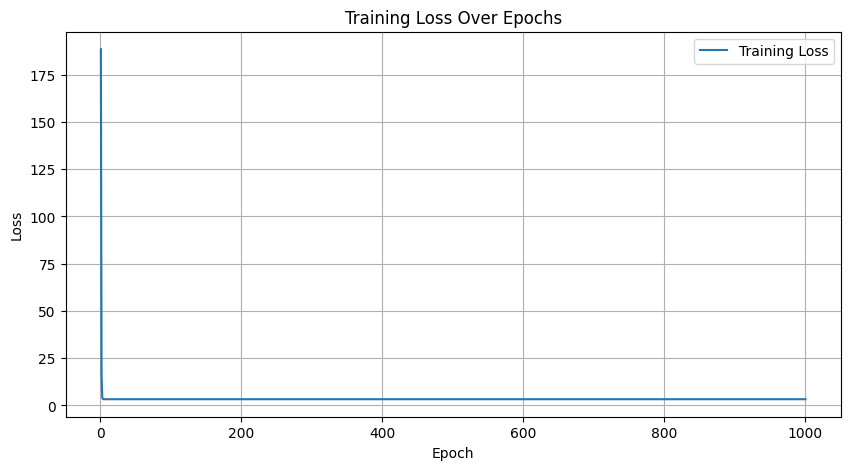

In [91]:
# Plot the training loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [92]:
# Training loop with validation loss recording
num_epochs = 1000
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Training step
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Validation step every 100 epochs
    if (epoch + 1) % 100 == 0:
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():
            val_outputs = model(X_test_tensor)
            val_loss = criterion(val_outputs, y_test_tensor)
        val_losses.append(val_loss.item())
        model.train()  # Set model back to training mode
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

Epoch [100/1000], Training Loss: 3.2711, Validation Loss: 3.1358
Epoch [200/1000], Training Loss: 3.2711, Validation Loss: 3.1359
Epoch [300/1000], Training Loss: 3.2711, Validation Loss: 3.1360
Epoch [400/1000], Training Loss: 3.2711, Validation Loss: 3.1360
Epoch [500/1000], Training Loss: 3.2711, Validation Loss: 3.1360
Epoch [600/1000], Training Loss: 3.2711, Validation Loss: 3.1361
Epoch [700/1000], Training Loss: 3.2711, Validation Loss: 3.1361
Epoch [800/1000], Training Loss: 3.2711, Validation Loss: 3.1361
Epoch [900/1000], Training Loss: 3.2711, Validation Loss: 3.1361
Epoch [1000/1000], Training Loss: 3.2711, Validation Loss: 3.1361


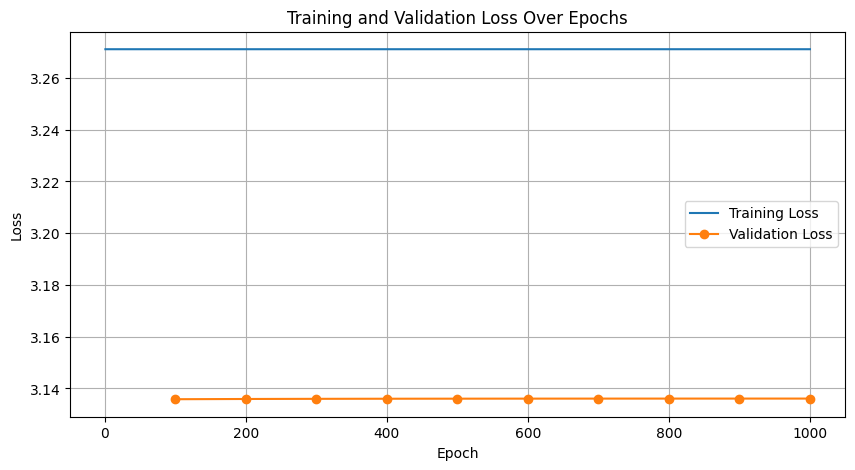

In [93]:
# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(100, num_epochs + 1, 100), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

##### **Q18: How do you use early stopping to prevent overfitting during training?**

In [94]:
# Redefine the model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input and one output feature
    
    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

In [95]:
# Redefine criterion, optimizer and DataLoader for batch processing
criterion = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=4, shuffle=True)

In [96]:
# Early stopping parameters
patience = 10
best_val_loss = float('inf')
epochs_no_improve = 0
early_stop = False

# Training loop with early stopping
num_epochs = 1000
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0
    for X_batch, y_batch in train_loader:
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    
    epoch_train_loss /= len(train_loader)
    train_losses.append(epoch_train_loss)
    
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
    val_losses.append(val_loss.item())

    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {epoch_train_loss:.4f}, Validation Loss: {val_loss.item():.4f}')
    
    # Early stopping logic
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve == patience:
            print('Early stopping!')
            early_stop = True
            break

if not early_stop:
    print('Finished training without early stopping.')

Epoch [1/1000], Training Loss: 6.0415, Validation Loss: 5.1858
Epoch [2/1000], Training Loss: 3.5869, Validation Loss: 3.5958
Epoch [3/1000], Training Loss: 3.7494, Validation Loss: 2.9961
Epoch [4/1000], Training Loss: 3.5544, Validation Loss: 2.8040
Epoch [5/1000], Training Loss: 3.3564, Validation Loss: 5.4332
Epoch [6/1000], Training Loss: 3.6589, Validation Loss: 3.4269
Epoch [7/1000], Training Loss: 3.6945, Validation Loss: 2.8100
Epoch [8/1000], Training Loss: 3.9817, Validation Loss: 3.3713
Epoch [9/1000], Training Loss: 4.0876, Validation Loss: 3.9709
Epoch [10/1000], Training Loss: 3.6591, Validation Loss: 6.1281
Epoch [11/1000], Training Loss: 3.6938, Validation Loss: 3.1546
Epoch [12/1000], Training Loss: 3.8200, Validation Loss: 3.6284
Epoch [13/1000], Training Loss: 3.7348, Validation Loss: 3.0602
Epoch [14/1000], Training Loss: 3.5262, Validation Loss: 2.9466
Early stopping!


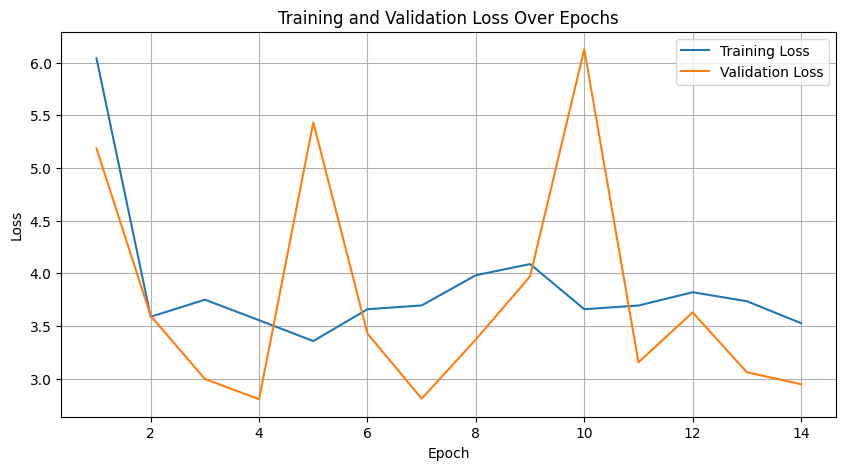

In [97]:
# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

## Evaluating the model

##### **Q19: How do you make predictions using your trained linear regression model?**

In [98]:
# Set model to evaluation mode
model.eval()

# Make predictions
with torch.no_grad():  # Disable gradient calculation
    predictions = model(X_test_tensor)

# Convert predictions to NumPy array (optional)
predictions = predictions.numpy()

# Print predictions
print("Predictions:", predictions)

Predictions: [[12.124081 ]
 [ 8.419637 ]
 [ 3.4595432]
 [ 2.786137 ]
 [ 5.9455595]
 [ 3.504285 ]
 [13.612725 ]
 [15.226347 ]
 [ 3.9591377]
 [11.52244  ]
 [13.170976 ]
 [ 8.4189625]
 [19.793644 ]
 [13.613246 ]
 [19.500357 ]
 [20.863697 ]
 [16.567936 ]
 [ 8.098184 ]
 [ 4.0960717]
 [19.216763 ]
 [ 9.588596 ]
 [16.558563 ]
 [ 8.035274 ]
 [17.713877 ]
 [12.728314 ]
 [11.536508 ]
 [ 5.49104  ]
 [16.125135 ]
 [ 8.067756 ]
 [14.201613 ]
 [21.222473 ]
 [18.112215 ]
 [18.31961  ]
 [10.622123 ]
 [11.676633 ]
 [ 1.8522369]
 [19.198788 ]
 [ 4.0175276]
 [19.182745 ]
 [ 5.5049973]]


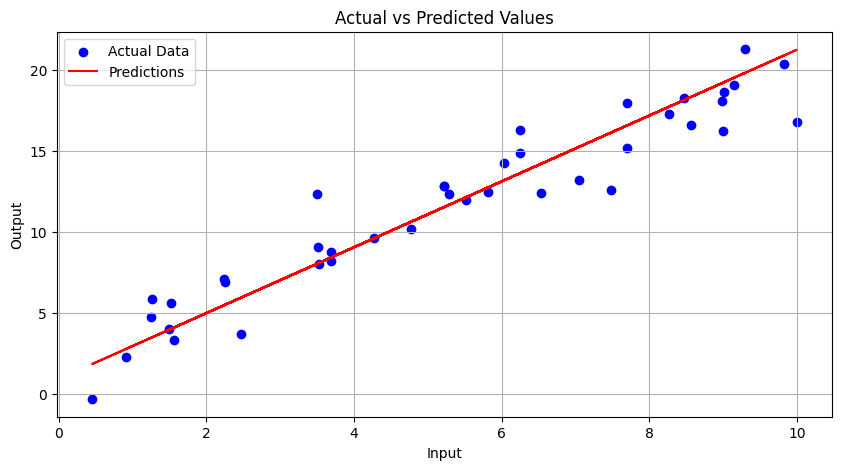

In [99]:
# Convert tensors to numpy arrays for plotting
X_test = X_test_tensor.numpy()
y_test = y_test_tensor.numpy()

# Plot the actual values and the predictions
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, predictions, color='red', label='Predictions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

##### **Q20: How do you evaluate the model's performance using metrics like Mean Squared Error (MSE)?**

In [101]:
# Use scikit-learn modules:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Convert tensors to numpy arrays if needed
predictions_np = predictions  # already converted in a previous step
y_test_np = y_test_tensor.numpy()

# Calculate metrics
mse = mean_squared_error(y_test_np, predictions_np)
print(f'Mean Squared Error: {mse:.4f}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.4f}')

mae = mean_absolute_error(y_test_np, predictions_np)
print(f'Mean Absolute Error: {mae:.4f}')

r2 = r2_score(y_test_np, predictions_np)
print(f'R-squared: {r2:.4f}')

Mean Squared Error: 2.9466
Root Mean Squared Error: 1.7166
Mean Absolute Error: 1.3248
R-squared: 0.9005


##### **Q21: How do you visualize the model's predictions against the actual data using `matplotlib`?**

In [102]:
# Convert values to NumPy arrays if needed
X_test_np = X_test_tensor.numpy()
y_test_np = y_test_tensor.numpy()

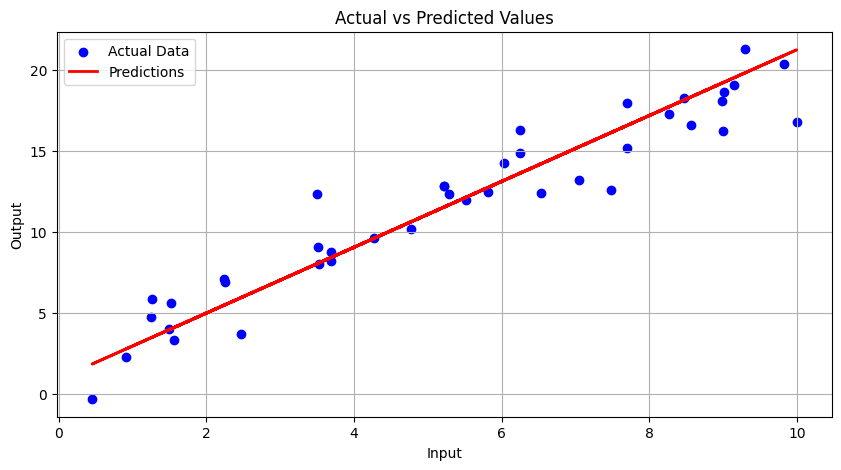

In [103]:
# Plot the actual values and the predictions
plt.figure(figsize=(10, 5))
plt.scatter(X_test_np, y_test_np, color='blue', label='Actual Data')
plt.plot(X_test_np, predictions_np, color='red', label='Predictions', linewidth=2)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

##### **Q22: How do you calculate the $R$-squared value to evaluate the goodness-of-fit for your model?**

In [104]:
# Code from a previous cell:
r2 = r2_score(y_test_np, predictions_np)
print(f'R-squared: {r2:.4f}')

R-squared: 0.9005


## Saving and loading the model

##### **Q23: How do you save the trained linear regression model in PyTorch?**

In [105]:
# Method 1: save the model state dictionary
torch.save(model.state_dict(), 'linear_regression_model.pth')

In [106]:
# Method 2: save the entire model
torch.save(model, 'linear_regression_model_complete.pth')

##### **Q24: How do you load a saved linear regression model in PyTorch?**

In [107]:
# For method 1:
model.load_state_dict(torch.load('linear_regression_model.pth'))
model.eval()

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [108]:
# For method 2:
model = torch.load('linear_regression_model_complete.pth')
model.eval()

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

##### **Q25: How do you save and load the model's state dictionary in PyTorch?**

In [109]:
# i.e., method 1:
torch.save(model.state_dict(), 'linear_regression_model.pth')

In [110]:
import os

filenames = ['linear_regression_model_complete.pth', 'linear_regression_model.pth']

for filename in filenames:
    if os.path.exists(filename):
        os.remove(filename)
        print(f'File {filename} deleted.')
    else:
        print(f'File {filename} not found.')

File linear_regression_model_complete.pth deleted.
File linear_regression_model.pth deleted.


## Optimizations

##### **Q26: How do you perform hyperparameter tuning to improve the performance of your linear regression model?**

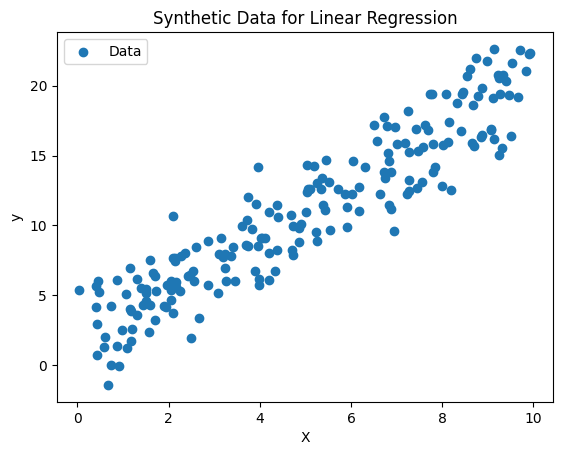

In [113]:
# Redefining dataset, just to make sure
true_slope = 2.0
true_intercept = 1.0

n_samples = 200
X = np.random.rand(n_samples, 1) * 10

noise = np.random.randn(n_samples, 1) * 2
y = true_slope * X + true_intercept + noise

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

plt.scatter(X, y, label='Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data for Linear Regression')
plt.legend()
plt.show()

In [114]:
# And the train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [117]:
from sklearn.model_selection import ParameterGrid

# Define the Linear Regression Model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        return self.linear(x)

# Check if GPU is available and set the device accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Create a training function
def train_model(learning_rate, batch_size, num_epochs):
    # Instantiate the model and move it to the device
    model = LinearRegressionModel().to(device)

    # Define the loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    # Create DataLoader for batch processing and move data to the device
    train_dataset = torch.utils.data.TensorDataset(X_train_tensor.to(device), y_train_tensor.to(device))
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

    # Training loop
    for epoch in range(num_epochs):
        for X_batch, y_batch in train_loader:
            # Forward pass
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            
            # Zero gradients, backward pass, and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    # Evaluate on validation set
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor.to(device))
        val_loss = criterion(val_outputs, y_test_tensor.to(device))
    
    return val_loss.item()

Using device: cuda


In [118]:
# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [4, 8, 16],
    'num_epochs': [100, 500, 1000]
}

# Perform grid search
best_params = None
best_loss = float('inf')

# Generate combinations of hyperparameters
grid = ParameterGrid(param_grid)

for params in grid:
    print(f'Training with params: {params}')
    val_loss = train_model(params['learning_rate'], params['batch_size'], params['num_epochs'])
    print(f'Validation Loss: {val_loss:.4f}')
    
    if val_loss < best_loss:
        best_loss = val_loss
        best_params = params

print(f'Best params: {best_params}')
print(f'Best validation loss: {best_loss:.4f}')

Training with params: {'batch_size': 4, 'learning_rate': 0.001, 'num_epochs': 100}
Validation Loss: 4.5020
Training with params: {'batch_size': 4, 'learning_rate': 0.001, 'num_epochs': 500}
Validation Loss: 4.3850
Training with params: {'batch_size': 4, 'learning_rate': 0.001, 'num_epochs': 1000}
Validation Loss: 4.4362
Training with params: {'batch_size': 4, 'learning_rate': 0.01, 'num_epochs': 100}
Validation Loss: 5.5781
Training with params: {'batch_size': 4, 'learning_rate': 0.01, 'num_epochs': 500}
Validation Loss: 4.9196
Training with params: {'batch_size': 4, 'learning_rate': 0.01, 'num_epochs': 1000}
Validation Loss: 5.0621
Training with params: {'batch_size': 4, 'learning_rate': 0.1, 'num_epochs': 100}
Validation Loss: nan
Training with params: {'batch_size': 4, 'learning_rate': 0.1, 'num_epochs': 500}
Validation Loss: nan
Training with params: {'batch_size': 4, 'learning_rate': 0.1, 'num_epochs': 1000}
Validation Loss: nan
Training with params: {'batch_size': 8, 'learning_ra

##### **Q27: How do you implement learning rate scheduling to adjust the learning rate during training?**

In [119]:
# Training function w/ learning rate scheduler
def train_model(learning_rate, batch_size, num_epochs, scheduler_type='StepLR'):
    model = LinearRegressionModel().to(device)

    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    train_dataset = torch.utils.data.TensorDataset(X_train_tensor.to(device), y_train_tensor.to(device))
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

    # Choose and configure the learning rate scheduler
    if scheduler_type == 'StepLR':
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)
    elif scheduler_type == 'ExponentialLR':
        scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)
    elif scheduler_type == 'ReduceLROnPlateau':
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        # Step the scheduler
        if scheduler_type in ['StepLR', 'ExponentialLR']:
            scheduler.step()
        elif scheduler_type == 'ReduceLROnPlateau':
            scheduler.step(loss)
    
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor.to(device))
        val_loss = criterion(val_outputs, y_test_tensor.to(device))
    
    return val_loss.item()

In [120]:
# New grid search:
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [4, 8, 16],
    'num_epochs': [100, 500, 1000]
}

best_params = None
best_loss = float('inf')

grid = ParameterGrid(param_grid)

for params in grid:
    print(f'Training with params: {params}')
    val_loss = train_model(params['learning_rate'], params['batch_size'], params['num_epochs'])
    print(f'Validation Loss: {val_loss:.4f}')
    
    if val_loss < best_loss:
        best_loss = val_loss
        best_params = params

print(f'Best params: {best_params}')
print(f'Best validation loss: {best_loss:.4f}')

Training with params: {'batch_size': 4, 'learning_rate': 0.001, 'num_epochs': 100}
Validation Loss: 4.4288
Training with params: {'batch_size': 4, 'learning_rate': 0.001, 'num_epochs': 500}
Validation Loss: 4.6437
Training with params: {'batch_size': 4, 'learning_rate': 0.001, 'num_epochs': 1000}
Validation Loss: 4.4601
Training with params: {'batch_size': 4, 'learning_rate': 0.01, 'num_epochs': 100}
Validation Loss: 4.3500
Training with params: {'batch_size': 4, 'learning_rate': 0.01, 'num_epochs': 500}
Validation Loss: 4.3979
Training with params: {'batch_size': 4, 'learning_rate': 0.01, 'num_epochs': 1000}
Validation Loss: 4.3871
Training with params: {'batch_size': 4, 'learning_rate': 0.1, 'num_epochs': 100}
Validation Loss: nan
Training with params: {'batch_size': 4, 'learning_rate': 0.1, 'num_epochs': 500}
Validation Loss: nan
Training with params: {'batch_size': 4, 'learning_rate': 0.1, 'num_epochs': 1000}
Validation Loss: nan
Training with params: {'batch_size': 8, 'learning_ra

##### **Q28: How do you normalize or standardize your data before training a linear regression model?**

In [121]:
# Normalization — i.e., rescaling the data to a fixed range, usually [0, 1] or [-1, 1]
X_train_np = X_train_tensor.numpy()
X_test_np = X_test_tensor.numpy()

# Calculate min and max values
X_min = X_train_np.min(axis=0)
X_max = X_train_np.max(axis=0)

# Normalize the training data
X_train_normalized = (X_train_np - X_min) / (X_max - X_min)
X_train_tensor_normalized = torch.tensor(X_train_normalized, dtype=torch.float32)

# Normalize the test data
X_test_normalized = (X_test_np - X_min) / (X_max - X_min)
X_test_tensor_normalized = torch.tensor(X_test_normalized, dtype=torch.float32)

In [122]:
# Grid search on normalized data:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input and one output feature
    
    def forward(self, x):
        return self.linear(x)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

def train_model(learning_rate, batch_size, num_epochs):
    model = LinearRegressionModel().to(device)

    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    train_dataset = torch.utils.data.TensorDataset(X_train_tensor_normalized.to(device), y_train_tensor.to(device))
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor_normalized.to(device))
        val_loss = criterion(val_outputs, y_test_tensor.to(device))
    
    return val_loss.item()

param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [4, 8, 16],
    'num_epochs': [100, 200, 500]
}

best_params = None
best_loss = float('inf')

grid = ParameterGrid(param_grid)

for params in grid:
    print(f'Training with params: {params}')
    val_loss = train_model(params['learning_rate'], params['batch_size'], params['num_epochs'])
    print(f'Validation Loss: {val_loss:.4f}')
    
    if val_loss < best_loss:
        best_loss = val_loss
        best_params = params

print(f'Best params: {best_params}')
print(f'Best validation loss: {best_loss:.4f}')

Using device: cuda
Training with params: {'batch_size': 4, 'learning_rate': 0.001, 'num_epochs': 100}
Validation Loss: 6.5569
Training with params: {'batch_size': 4, 'learning_rate': 0.001, 'num_epochs': 200}
Validation Loss: 4.2576
Training with params: {'batch_size': 4, 'learning_rate': 0.001, 'num_epochs': 500}
Validation Loss: 4.1197
Training with params: {'batch_size': 4, 'learning_rate': 0.01, 'num_epochs': 100}
Validation Loss: 4.3714
Training with params: {'batch_size': 4, 'learning_rate': 0.01, 'num_epochs': 200}
Validation Loss: 4.3925
Training with params: {'batch_size': 4, 'learning_rate': 0.01, 'num_epochs': 500}
Validation Loss: 4.3879
Training with params: {'batch_size': 4, 'learning_rate': 0.1, 'num_epochs': 100}
Validation Loss: 4.4857
Training with params: {'batch_size': 4, 'learning_rate': 0.1, 'num_epochs': 200}
Validation Loss: 4.4357
Training with params: {'batch_size': 4, 'learning_rate': 0.1, 'num_epochs': 500}
Validation Loss: 4.5793
Training with params: {'bat

In [123]:
# Standardization — i.e., transforming the data to have a mean of 0 and a standard deviation of 1
X_train_np = X_train_tensor.numpy()
X_test_np = X_test_tensor.numpy()

# Calculate mean and standard deviation
X_mean = X_train_np.mean(axis=0)
X_std = X_train_np.std(axis=0)

# Standardize the training data
X_train_standardized = (X_train_np - X_mean) / X_std
X_train_tensor_standardized = torch.tensor(X_train_standardized, dtype=torch.float32)

# Standardize the test data
X_test_standardized = (X_test_np - X_mean) / X_std
X_test_tensor_standardized = torch.tensor(X_test_standardized, dtype=torch.float32)

In [124]:
# Grid search on standardized data:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input and one output feature
    
    def forward(self, x):
        return self.linear(x)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

def train_model(learning_rate, batch_size, num_epochs):
    model = LinearRegressionModel().to(device)

    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    train_dataset = torch.utils.data.TensorDataset(X_train_tensor_standardized.to(device), y_train_tensor.to(device))
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor_standardized.to(device))
        val_loss = criterion(val_outputs, y_test_tensor.to(device))
    
    return val_loss.item()

param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [4, 8, 16],
    'num_epochs': [100, 200, 500]
}

best_params = None
best_loss = float('inf')

grid = ParameterGrid(param_grid)

for params in grid:
    print(f'Training with params: {params}')
    val_loss = train_model(params['learning_rate'], params['batch_size'], params['num_epochs'])
    print(f'Validation Loss: {val_loss:.4f}')
    
    if val_loss < best_loss:
        best_loss = val_loss
        best_params = params

print(f'Best params: {best_params}')
print(f'Best validation loss: {best_loss:.4f}')

Using device: cuda
Training with params: {'batch_size': 4, 'learning_rate': 0.001, 'num_epochs': 100}
Validation Loss: 4.3898
Training with params: {'batch_size': 4, 'learning_rate': 0.001, 'num_epochs': 200}
Validation Loss: 4.3890
Training with params: {'batch_size': 4, 'learning_rate': 0.001, 'num_epochs': 500}
Validation Loss: 4.3897
Training with params: {'batch_size': 4, 'learning_rate': 0.01, 'num_epochs': 100}
Validation Loss: 4.4327
Training with params: {'batch_size': 4, 'learning_rate': 0.01, 'num_epochs': 200}
Validation Loss: 4.4060
Training with params: {'batch_size': 4, 'learning_rate': 0.01, 'num_epochs': 500}
Validation Loss: 4.3841
Training with params: {'batch_size': 4, 'learning_rate': 0.1, 'num_epochs': 100}
Validation Loss: 4.0878
Training with params: {'batch_size': 4, 'learning_rate': 0.1, 'num_epochs': 200}
Validation Loss: 4.0904
Training with params: {'batch_size': 4, 'learning_rate': 0.1, 'num_epochs': 500}
Validation Loss: 4.1422
Training with params: {'bat

##### **Q29: How do you handle multicollinearity in linear regression models?**

In [128]:
# First and foremost, expand the current dataset w/ new features
X_train_np = X_train_tensor.numpy()
X_test_np = X_test_tensor.numpy()

# Number of new features to add
num_new_features = 9

# Generate new features for training and test sets
np.random.seed(0)  # For reproducibility
new_features_train = np.random.randn(X_train_np.shape[0], num_new_features)
new_features_test = np.random.randn(X_test_np.shape[0], num_new_features)

In [129]:
# Combine the original feature with the new features
X_train_combined = np.hstack((X_train_np, new_features_train))
X_test_combined = np.hstack((X_test_np, new_features_test))

# Convert the combined arrays back to PyTorch tensors
X_train_tensor_combined = torch.tensor(X_train_combined, dtype=torch.float32)
X_test_tensor_combined = torch.tensor(X_test_combined, dtype=torch.float32)

# Print the shapes to verify
print(f'X_train_tensor_combined shape: {X_train_tensor_combined.shape}')
print(f'X_test_tensor_combined shape: {X_test_tensor_combined.shape}')

X_train_tensor_combined shape: torch.Size([160, 10])
X_test_tensor_combined shape: torch.Size([40, 10])


In [132]:
# Now the process begins
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Convert the tensors to pandas DataFrame for easier manipulation
df_train = pd.DataFrame(X_train_combined)

# Calculate the correlation matrix
corr_matrix = df_train.corr()
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
          0         1         2         3         4         5         6  \
0  1.000000 -0.013829  0.042836 -0.041774 -0.183741 -0.003152 -0.018901   
1 -0.013829  1.000000  0.082443  0.054742  0.153097 -0.014283 -0.052105   
2  0.042836  0.082443  1.000000 -0.041404  0.028526  0.163898 -0.148396   
3 -0.041774  0.054742 -0.041404  1.000000 -0.042158  0.025325  0.151158   
4 -0.183741  0.153097  0.028526 -0.042158  1.000000 -0.026987 -0.024227   
5 -0.003152 -0.014283  0.163898  0.025325 -0.026987  1.000000  0.055855   
6 -0.018901 -0.052105 -0.148396  0.151158 -0.024227  0.055855  1.000000   
7 -0.051895  0.136103 -0.138102 -0.036316  0.064769 -0.100890 -0.001728   
8  0.063006  0.121697  0.039022  0.059120 -0.097152  0.048954  0.057495   
9 -0.022363  0.045292  0.059412 -0.117329  0.001570  0.049075 -0.061999   

          7         8         9  
0 -0.051895  0.063006 -0.022363  
1  0.136103  0.121697  0.045292  
2 -0.138102  0.039022  0.059412  
3 -0.036316  0.059

In [133]:
# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = df_train.columns
vif_data["VIF"] = [variance_inflation_factor(df_train.values, i) for i in range(df_train.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Variance Inflation Factor (VIF):
   feature       VIF
0        0  1.065569
1        1  1.091142
2        2  1.089314
3        3  1.047386
4        4  1.041887
5        5  1.056136
6        6  1.061518
7        7  1.099216
8        8  1.093887
9        9  1.087311


In [134]:
# Ridge regression model
class RidgeRegressionModel(nn.Module):
    def __init__(self, input_dim, alpha):
        super(RidgeRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.alpha = alpha
    
    def forward(self, x):
        return self.linear(x)
    
    def l2_regularization_loss(self):
        return self.alpha * torch.sum(self.linear.weight ** 2)

In [135]:
# Check if GPU is available and set the device accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

def train_ridge_model(learning_rate, batch_size, num_epochs, alpha):
    input_dim = X_train_tensor_combined.shape[1]
    model = RidgeRegressionModel(input_dim, alpha).to(device)

    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    train_dataset = torch.utils.data.TensorDataset(X_train_tensor_combined.to(device), y_train_tensor.to(device))
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch) + model.l2_regularization_loss()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor_combined.to(device))
        val_loss = criterion(val_outputs, y_test_tensor.to(device))
    
    return val_loss.item()

Using device: cuda


In [136]:
# Example hyperparameters
learning_rate = 0.01
batch_size = 8
num_epochs = 1000
alpha = 0.1  # L2 regularization strength

val_loss = train_ridge_model(learning_rate, batch_size, num_epochs, alpha)
print(f'Validation Loss: {val_loss:.4f}')

Validation Loss: 4.0329


##### **Q30: How do you implement polynomial regression using PyTorch to capture non-linear relationships?**

In [145]:
# First, create a set of polynomial features
from sklearn.preprocessing import PolynomialFeatures

X_train_np = X_train_tensor.numpy()
X_test_np = X_test_tensor.numpy()

num_new_features = 3

np.random.seed(0)  # For reproducibility
new_features_train = np.random.randn(X_train_np.shape[0], num_new_features)
new_features_test = np.random.randn(X_test_np.shape[0], num_new_features)

X_train_combined = np.hstack((X_train_np, new_features_train))
X_test_combined = np.hstack((X_test_np, new_features_test))

degree = 2
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train_combined)
X_test_poly = poly.transform(X_test_combined)

X_train_tensor_poly = torch.tensor(X_train_poly, dtype=torch.float32)
X_test_tensor_poly = torch.tensor(X_test_poly, dtype=torch.float32)

print(f'X_train_tensor_poly shape: {X_train_tensor_poly.shape}')
print(f'X_test_tensor_poly shape: {X_test_tensor_poly.shape}')

X_train_tensor_poly shape: torch.Size([160, 15])
X_test_tensor_poly shape: torch.Size([40, 15])


In [146]:
# Define a polynomial regression model
class PolynomialRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(PolynomialRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        return self.linear(x)

In [147]:
# CUDA check and training loop function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

def train_polynomial_model(learning_rate, batch_size, num_epochs):
    input_dim = X_train_tensor_poly.shape[1]
    model = PolynomialRegressionModel(input_dim).to(device)

    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    train_dataset = torch.utils.data.TensorDataset(X_train_tensor_poly.to(device), y_train_tensor.to(device))
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor_poly.to(device))
        val_loss = criterion(val_outputs, y_test_tensor.to(device))
    
    return val_loss.item(), model

Using device: cuda


In [150]:
# Hyperparameters and training
learning_rate = 0.0001
batch_size = 4
num_epochs = 1000

val_loss, trained_model = train_polynomial_model(learning_rate, batch_size, num_epochs)
print(f'Validation Loss: {val_loss:.4f}')

Validation Loss: 5.1445


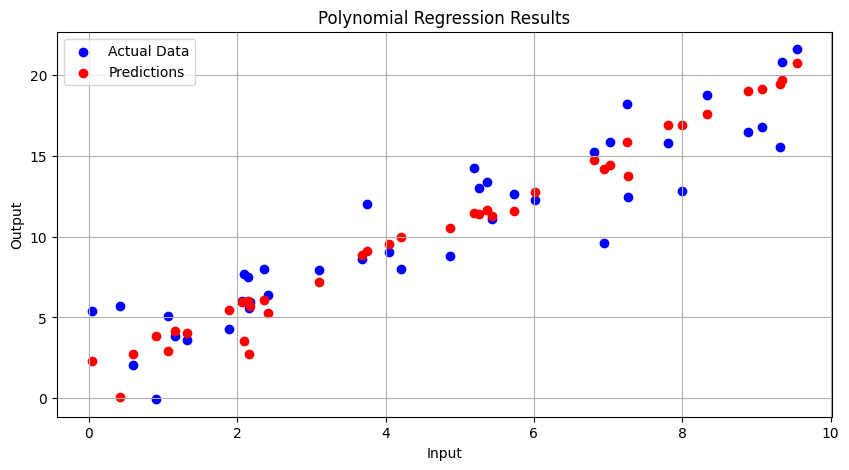

In [151]:
# Visualize the results
def plot_results(model, X_tensor, y_tensor, poly):
    model.eval()
    with torch.no_grad():
        predictions = model(X_tensor.to(device)).cpu().numpy()
    
    plt.figure(figsize=(10, 5))
    plt.scatter(X_tensor[:, 1].numpy(), y_tensor.numpy(), color='blue', label='Actual Data')  # X_tensor[:, 1] because it's the original feature
    plt.scatter(X_tensor[:, 1].numpy(), predictions, color='red', label='Predictions')
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.title('Polynomial Regression Results')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the results for the test set
plot_results(trained_model, X_test_tensor_poly, y_test_tensor, poly)

## Conclusion

In this `02_linear_regression` notebook, we explored several key topics necessary for mastering linear regression with PyTorch. We started with setting up the environment and generating synthetic data to mimic real-world conditions. The exercises led us through the process of defining a linear regression model, setting up loss functions and optimizers, and constructing training loops to fit the model to the dataset.

We examined how to evaluate the model's performance using various metrics, visualized the predictions, and discussed saving and loading models for later use. Additionally, we covered optimization methods to improve model accuracy and performance.

These exercises collectively offer a solid foundation in linear regression with PyTorch, equipping us for more advanced machine learning applications and projects.

## Further exercises

##### **Q31: How do you extend the linear regression model to handle multiple features (multivariate linear regression)?**

##### **Q32: How do you use PyTorch to perform linear regression on a real-world dataset, such as the Boston Housing dataset?**

##### **Q33: How do you implement ridge regression (L2 regularization) using PyTorch to prevent overfitting?**

##### **Q34: How do you implement lasso regression (L1 regularization) using PyTorch to enforce sparsity in the model?**

##### **Q35: How do you visualize the learned weights of the linear regression model to interpret feature importance?**